# Controls charts&mdash;individuals and moving range (XmR)

# Document

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Control charts---individuals and moving range</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2018-09-12</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2017-08-26</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">control_charts_xmr.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">xmr.csv</td>
    </tr>
</table>

# In brevi

Shewhart control charts, also called process behaviour charts, are used to determine if the variation of a process is stable and predictable, that is, in a state of statistical control. In-control variation arises from chance or common causes. No changes or adjustments to the process are needed. The charts can be used to predict future performance. Out-of-control variation arises from special or assignable causes. These charts help identify the special causes in order minimize or eliminate their effect.

# Data

Download the [data file](https://drive.google.com/open?id=0BzrdQfHR2I5DRld4MndVT2R0dEk). It consists of a "Date" column and an "X" column of floats or integers. Dates are entered using [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) date format (yyyy-mm-dd).

# Methodology

The charts presented here are the individuals and moving range control charts, also called XmR or ImR. The data are collected using rational samples. The individual values (sample size is one) are plotted in time order. A central line (average) and control limits above and below the central line are plotted.


# Control chart formulae

## Individuals chart (X)

$$
    \begin{align}
        UCL_X, LCL_X & = \overline{X} \pm 3 \times \text{Sigma(X)} \\
                     & = \overline{X} \pm 3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_2$ can be found in tables of control chart constants. It is a rescaling constant that changes an average range to a standard deviation. The value of $d_2$ changes as the subgroup size n changes. It is common to use a moving range subgroup size 2.

## Moving range chart (mR)

$$
    \begin{align}
        UCL_R, LCL_R & = \overline{R} \pm 3 \times \text{Sigma(R)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \text{Sigma(X)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_3$ can be found in tables of control chart constants. It is a rescaling constant that changes a a standard deviation of individual values to a standard deviation of range values. The value of $d_3$ is a function of sugroup size.

In [1]:
# Import the initial, required libraries and modules.
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Read the csv data file. It is encoded in UTF-8.
# File has one column X, or two columns Date and X.
# Set "Date" as the index.
df = pd.read_csv('xmr.csv', parse_dates=True, index_col='Date')
#df = pd.read_csv('xmr.csv')
df.index.name='Sample'
# Edit this if calculating monthly travel costs.
months = 10

In [3]:
# Define the X chart labels.
x_chart_title = 'Individuals Control Chart'
x_chart_subtitle = 'Travel Cost'
x_chart_ylabel = 'Travel Cost (USD)'
x_chart_xlabel = 'Date'
#x_chart_xlabel = 'Sample'
subgroup_size = 2

In [4]:
# Determine d2 and d3 constants.
constants = pd.read_csv('control_chart_constants.csv')
d2 = constants['d2'][constants['n'] == subgroup_size].values[0]
d3 = constants['d3'][constants['n'] == subgroup_size].values[0]

In [5]:
# Define for the mR chart the graph title and subtitle, and the x and y axis labels.
mr_chart_title = 'Moving Range Control Chart'
mr_chart_subtitle = 'Travel Cost Difference'
mr_chart_ylabel = 'Travel Cost Moving Range (USD)'
mr_chart_xlabel = 'Date'

In [6]:
# Moving range chart statistics
# Calculate average moving range.
average_mr = (df['X'].rolling(2).agg(lambda x: x[0] - x[1]) \
                                .abs()) \
                                .mean()
# Calculate Sigma(R).
sigma_r = average_mr * d3 / d2
# Calculate the range chart upper control limit.
r_chart_ucl = average_mr + 3 * sigma_r
# Calculate the range chart lower control limit.
r_chart_lcl = average_mr - 3 * sigma_r
if r_chart_lcl < 0:
    r_chart_lcl = 0

In [7]:
# X chart statistics
# Calculate the average of all values.
average = df['X'].mean()
total = df['X'].sum()
# Calculate Sigma(X).
sigma_x = average_mr / d2
# Calculate the X chart upper control limit.
x_chart_ucl = average + 3 * sigma_x
# Calculate two Sigma(X) above the average.
plus_two_sigma_x = average + 2 * sigma_x
# Calculate one Sigma(X) abovfe the average.
plus_one_sigma_x = average + 1 * sigma_x
# Calculate the X chart lower control limit.
x_chart_lcl = average - 3 * sigma_x 
# Calculate two Sigma(X) below the average.
minus_two_sigma_x = average - 2 * sigma_x
# Calculate one Sigma(X) below the average.
minus_one_sigma_x = average - 1 * sigma_x

In [8]:
# Use a colour-blind friendly colormap, "Paired".
import matplotlib.cm as cm
lines_c, limits_c, average_c, *_ = cm.Paired.colors

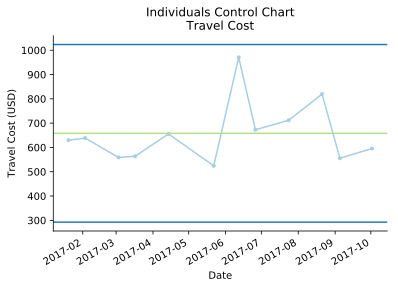

In [9]:
# Create a graph of "individual values v. date".
ax = df[['X']].plot.line(legend=False, marker='o', \
                         markersize=3, color=lines_c)
#ax.axhline(y=average, color='b')
ax.axhline(y=average, color=average_c)
#ax.axhline(y=x_chart_ucl, color='r')
ax.axhline(y=x_chart_ucl, color=limits_c)
#ax.axhline(y=x_chart_lcl, color='r')
ax.axhline(y=x_chart_lcl, color=limits_c)
ax.axis('auto')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
# Add the chart title and subtitle.
ax.set_title(x_chart_title + '\n' + x_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(x_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(x_chart_xlabel)
# Save the graph as svg and pdf.
ax.figure.savefig('x.svg', format='svg')
ax.figure.savefig('x.pdf', format='pdf')

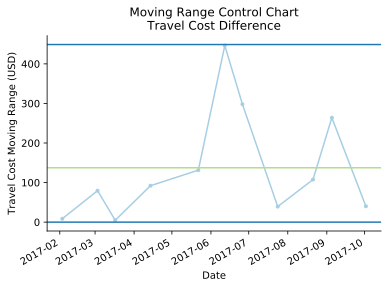

In [10]:
# Create a graph of "moving range values v. date".
ax = df['X'].rolling(2) \
            .agg(lambda x: x[0] - x[1]) \
            .abs() \
            .plot.line(legend=False, marker='o', \
                       markersize=3, color=lines_c)
#ax.axhline(y=average_mr, color='b')
ax.axhline(y=average_mr, color=average_c)
#ax.axhline(y=r_chart_ucl, color='r')
ax.axhline(y=r_chart_ucl, color=limits_c)
#ax.axhline(y=r_chart_lcl, color='r')
ax.axhline(y=r_chart_lcl, color=limits_c)
ax.axis('auto')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
# Add the chart title and subtitle.
ax.set_title(mr_chart_title + '\n' + mr_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(mr_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(mr_chart_xlabel)
# Save the graph as svg and pdf.
ax.figure.savefig('mr.svg', format='svg')
ax.figure.savefig('mr.pdf', format='pdf')

# Descriptive statistics

## Individuals control chart

In [11]:
print('Sigma(X)',
      sigma_x,
      sep=' = ')
print('Upper control limit',
      x_chart_ucl,
      sep=' = ')
print('+ 2 Sigma(X)',
      average + 2 * sigma_x,
      sep=' = ')
print('+ 1 Sigma(X)',
      average + sigma_x,
      sep=' = ')
print('Average',
      average,
      sep=' = ')
print('- 1 Sigma(X)',
      average - sigma_x,
      sep=' = ')
print('- 2 Sigma(X)',
      average - 2 * sigma_x,
      sep=' = ')
print('Lower control limit',
      x_chart_lcl,
      sep=' = ')
# Monthly travel cost (not average)
print('Average monthly cost',
      total / months,
      sep=' =')

Sigma(X) = 121.80045132172795
Upper control limit = 1023.4230206318505
+ 2 Sigma(X) = 901.6225693101226
+ 1 Sigma(X) = 779.8221179883946
Average = 658.0216666666666
- 1 Sigma(X) = 536.2212153449387
- 2 Sigma(X) = 414.4207640232107
Lower control limit = 292.6203127014828
Average monthly cost =789.626


## Moving range control chart

In [12]:
print('Sigma(R)',
      sigma_r,
      sep=' = ')
print('Upper control limit',
      r_chart_ucl,
      sep=' = ')
print('Average moving range',
      average_mr,
      sep=' = ')
print('Lower control limit',
      r_chart_lcl,
      sep=' = ')

Sigma(R) = 103.83488475177307
Upper control limit = 448.8955633462283
Average moving range = 137.3909090909091
Lower control limit = 0


# Interpretation

## Moving range control chart
The moving range chart measures the within-subroup variation. If the process is in statistical control (all rules met), the estimation of dispersion should be useful. This chart should be evaluated first because $\overline{R}$ is used in the control limits of the individuals chart.

## Individuals control chart
The individuals control chart measures the *location* of the process. Use the Shewhart detection rules in the order as follows.

### Detection rule one
A process is out-of-control if one value is greater than the upper control limit or one value is less than the lower control limit. If there are no out-of-control values, proceed to the next rule. If there are out-of-control values, fix the root causes.

In [13]:
from IPython.display import display_html

In [14]:
# Find values greater than the upper control limit.
rule_one_above = df[(df['X'] > x_chart_ucl)]
for i in range(0, rule_one_above.shape[0], 10):
    display_html(rule_one_above.iloc[i:i+10].T)

In [15]:
# Find values less than the lower control limit.
rule_one_below = df[df['X'] < x_chart_lcl]
for i in range(0, rule_one_below.shape[0], 10):
    display_html(rule_one_below.iloc[i:i+10].T)

### Detection rule five
The process is out-of-control if two out-of-three consecutive values are greater than two Sigma(X) above the average or two out-of-three consecutive values less than two Sigma(X) below the average. If there are no out-of-control values, proceed to the next rule. If there are out-of-control values, fix the root causes.

In [16]:
# Create a list with X above 2 sigma.
above_two_sigma_x_list = []
for value in df['X']:
    if value >= plus_two_sigma_x:
        above_two_sigma_x_list.append(1)
    else:
        above_two_sigma_x_list.append(0)
# Create a column from the list.
df['above_two_sigma_x'] = above_two_sigma_x_list
# Display values where 2 of 3 consecutive X > 2 sigma.
df['above_two_sigma_x_rule_5'] = df['above_two_sigma_x'].rolling(3) \
                                                        .sum()
rule_five_above = df.loc[(df['above_two_sigma_x_rule_5'] >= 2)][['X']]
for i in range(0, rule_five_above.shape[0], 10):
    display_html(rule_five_above.iloc[i:i+10].T)

In [17]:
# Create a list with X below 2 sigma.
below_two_sigma_x_list = []
for value in df['X']:
    if value <= minus_two_sigma_x:
        below_two_sigma_x_list.append(1)
    else:
        below_two_sigma_x_list.append(0)
# Create a column from the list.
df['below_two_sigma_x'] = below_two_sigma_x_list
# Display values where 2 of 3 consecutive X < 2 sigma.
df['below_two_sigma_x_rule_5'] = df['below_two_sigma_x'].rolling(3) \
                                                        .sum()
rule_five_below = df.loc[(df['below_two_sigma_x_rule_5'] >= 2)][['X']]
for i in range(0, rule_five_below.shape[0], 10):
    display_html(rule_five_below.iloc[i:i+10].T)

In [18]:
df = df.drop(['above_two_sigma_x', 
              'above_two_sigma_x_rule_5', 
              'below_two_sigma_x',
              'below_two_sigma_x_rule_5'
             ], axis=1)

### Detection rule six
A process is out-of-control if four out-of-five consecutive values are greater than one Sigma(X) above the average or four out-of-five consecutive values are less than one Sigma(X) below the average.  If there are no out-of-control values, proceed to the next rule. If there are out-of-control values, fix the root causes.

In [19]:
# Create a list with X above 1 sigma.
above_one_sigma_x_list = []
for value in df['X']:
    if value >= plus_one_sigma_x:
        above_one_sigma_x_list.append(1)
    else:
        above_one_sigma_x_list.append(0)
# Create a column from the list.
df['above_one_sigma_x'] = above_one_sigma_x_list
# Display values where 4 of 5 consecutive X > 1 sigma.
df['above_one_sigma_x_rule_6'] = df['above_one_sigma_x'].rolling(5) \
                                                        .sum()
rule_six_above = df.loc[(df['above_one_sigma_x_rule_6'] >= 4)][['X']]
for i in range(0, rule_six_above.shape[0], 10):
    display_html(rule_six_above.iloc[i:i+10].T)

In [20]:
# Create a list with X below 1 sigma.
below_one_sigma_x_list = []
for value in df['X']:
    if value <= minus_one_sigma_x:
        below_one_sigma_x_list.append(1)
    else:
        below_one_sigma_x_list.append(0)
# Create a column from the list.
df['below_one_sigma_x'] = below_one_sigma_x_list
# Display values where 4 of 5 consecutive X < 1 sigma.
df['below_one_sigma_x_rule_6'] = df['below_one_sigma_x'].rolling(5) \
                                                        .sum()
rule_six_below = df.loc[(df['below_one_sigma_x_rule_6'] >= 4)][['X']]
for i in range(0, rule_six_below.shape[0], 10):
    display_html(rule_six_below.iloc[i:i+10].T)

In [21]:
df = df.drop(['above_one_sigma_x', 
              'above_one_sigma_x_rule_6', 
              'below_one_sigma_x',
              'below_one_sigma_x_rule_6'
             ], axis=1)

 ### Detection rule two
 A process is out-of-control if eight or more consecutive values are on the same side of the average or eight or more consecutive values are on the same side of the average. If there are no out-of-control values, proceed to the next rule. If there are out-of-control values, fix the root causes.

In [22]:
# Create a list with X above the average for eight or more consecutive values.
above_average_x_list = []
for value in df['X']:
    if value > average:
        above_average_x_list.append(1)
    else:
        above_average_x_list.append(0)
# Create a column from the list.
df['above_average_x'] = above_average_x_list
# Display values where 8 consecutive X > average.
df['above_average_x_rule_2'] = df['above_average_x'].rolling(8) \
                                                    .sum()
rule_two_above = df.loc[(df['above_average_x_rule_2'] >= 8)][['X']]
for i in range(0, rule_two_above.shape[0], 10):
    display_html(rule_two_above.iloc[i:i+10].T)

In [23]:
# Create a list with X below the average for eight or more consecutive values.
below_average_x_list = []
for value in df['X']:
    if value < average:
        below_average_x_list.append(1)
    else:
        below_average_x_list.append(0)
# Create a column from the list.
df['below_average_x'] = below_average_x_list
# Display values where 8 consecutive X < average.
df['below_average_x_rule_2'] = df['below_average_x'].rolling(8) \
                                                    .sum()
rule_two_below = df.loc[(df['below_average_x_rule_2'] >= 8)][['X']]
for i in range(0, rule_two_below.shape[0], 10):
    display_html(rule_two_below.iloc[i:i+10].T)

In [24]:
df = df.drop(['above_average_x', 
              'above_average_x_rule_2', 
              'below_average_x',
              'below_average_x_rule_2'
             ], axis=1)

### Detection rule three
Variation is unpredictable when six consecutive values are increasing or decreasing.

In [25]:
rule_3_list_1 = []
for value in df['X']:
    rule_3_list_1 = df['X'].rolling(2) \
                           .agg(lambda x: x[0] - x[1])
df['rule_3_list_1'] = rule_3_list_1
rule_3_list_2 = []
for value in df['rule_3_list_1']:
    if value > 0:
        rule_3_list_2.append(1)
    else:
        rule_3_list_2.append(0)
df['rule_3_list_2'] = rule_3_list_2
rule_three_above = df.loc[(df['rule_3_list_2'] >= 6)][['X']]
for i in range(0, rule_three_above.shape[0], 10):
    display_html(rule_three_above.iloc[i:i+10].T)

In [26]:
rule_3_list_3 = []
for value in df['rule_3_list_1']:
    if value < 0:
        rule_3_list_3.append(1)
    else:
        rule_3_list_3.append(0)
df['rule_3_list_3'] = rule_3_list_3
rule_three_below = df.loc[(df['rule_3_list_3'] >= 6)][['X']]
for i in range(0, rule_three_below.shape[0], 10):
    display_html(rule_three_below.iloc[i:i+10].T)

In [27]:
df = df.drop(['rule_3_list_1', 
              'rule_3_list_2', 
              'rule_3_list_3'
             ], axis=1)

### Detection rule four
Variation is unpredictable when fourteen consecutive values alternate up and down.

In [28]:
# Create a list with X alternating up and down for 14 or more
# consecutive values.
rule_4_list_1 = []
for value in df['X']:
    rule_4_list_1 = df['X'].rolling(2)\
                           .agg(lambda x: x[0] - x[1])
df['rule_4_list_1'] = rule_4_list_1
rule_4_list_2 = []
for value in df['rule_4_list_1']:
    if value > 0:
        rule_4_list_2.append(1)
    else:
        rule_4_list_2.append(0)
df['rule_4_list_2']= rule_4_list_2
rule_4_list_3 =[]
for value in df['rule_4_list_1']:
    if value < 0:
        rule_4_list_3.append(1)
    else:
        rule_4_list_3.append(0)
df['rule_4_list_3'] = rule_4_list_3
df['rule_4_list_4']= df[['rule_4_list_2', 'rule_4_list_3']].sum(axis='columns')

In [29]:
df.head(10)

,X,rule_4_list_1,rule_4_list_2,rule_4_list_3,rule_4_list_4
Sample,,,,,
2017-01-20,629.79,NaN,0,0,0
2017-02-03,638.38,-8.59,0,1,1
2017-03-03,558.90,79.48,1,0,1
2017-03-17,563.56,-4.66,0,1,1
2017-04-14,655.63,-92.07,0,1,1
2017-05-22,524.23,131.40,1,0,1
2017-06-12,970.57,-446.34,0,1,1
2017-06-26,672.65,297.92,1,0,1
2017-07-24,711.91,-39.26,0,1,1


In [30]:
# My logic above isn't right, but close.

In [31]:
# Display values where 14 or more consecutive values alternate
# up and down.
df['rule_4_list_5'] = df['rule_4_list_4'].rolling(14) \
                                         .sum()
rule_four = df.loc[(df['rule_4_list_5'] >= 14)][['X']]
for i in range(0, rule_four.shape[0], 10):
    display_html(rule_four.iloc[i:i+10].T)

In [32]:
df = df.drop(['rule_4_list_1',
              'rule_4_list_2',
              'rule_4_list_3',
              'rule_4_list_4',
              'rule_4_list_5'
             ], axis=1)

### Detection rule seven
Variation is unpredictable when fifteen consecutive values are between $\pm$ one Sigma(X).

In [33]:
# Create a list with X within one Sigma(X) of the average.
within_one_sigma_x_list = []
for value in df['X']:
    if value <= plus_one_sigma_x <= minus_one_sigma_x:
        within_one_sigma_x_list.append(1)
    else:
        within_one_sigma_x_list.append(0)
# Create a column from the list.
df['within_one_sigma_x'] = within_one_sigma_x_list
# Display values where 15 consecutive values are within one Sigma(X)
# of the average.
rule_seven = df.loc[(df['within_one_sigma_x'] >= 15)][['X']]
for i in range(0, rule_seven.shape[0], 10):
    display_html(rule_seven.iloc[i:i+10].T)

In [34]:
df = df.drop(['within_one_sigma_x'], axis=1)

### Detection rule eight
Variation is unpredictable when eight consecutive values are on both sides of the average with none between $\pm$ one Sigma(X).

In [35]:
# Create a list with X beyond one Sigma(X).
beyond_one_sigma_x_list = []
for value in df['X']:
    if value >= plus_one_sigma_x or value <= minus_one_sigma_x:
        beyond_one_sigma_x_list.append(1)
    else:
        beyond_one_sigma_x_list.append(0)
# Create a column from the list.
df['beyond_one_sigma_x'] = beyond_one_sigma_x_list
# Display values where 8 consecutive values are on both sides
# of the average with none within one Sigma(X) of the average.
rule_eight = df.loc[(df['beyond_one_sigma_x'] >= 8)][['X']]
for i in range(0, rule_eight.shape[0], 10):
    display_html(rule_eight.iloc[i:i+10].T)

In [36]:
df = df.drop(['beyond_one_sigma_x'], axis=1)

#  Development
- Add rules to the moving range control chart
- Add code to rule four
- Find (NIST?) data sets for each rule and test

# References

Wheeler, Donald J. 1995. *Advanced Topics in Statistical Process Control*. Knoxville, TN: SPC Press, Inc.